<a href="https://colab.research.google.com/github/Ankushsb62/OASIS-INFOBYTE/blob/PROJECT-1/EDA_on_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
retail_data = pd.read_csv('/content/retail_sales_dataset.csv')

# Check for missing values
print("Missing values in each column:")
print(retail_data.isnull().sum())

# Drop any unnecessary columns or rows, if needed
# retail_data.drop(['column_name'], axis=1, inplace=True)

# Convert date column to datetime format
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

Missing values in each column:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [ ]:
# Calculate basic statistics
print("Descriptive Statistics:")
print(retail_data.describe())

Descriptive Statistics:
       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000

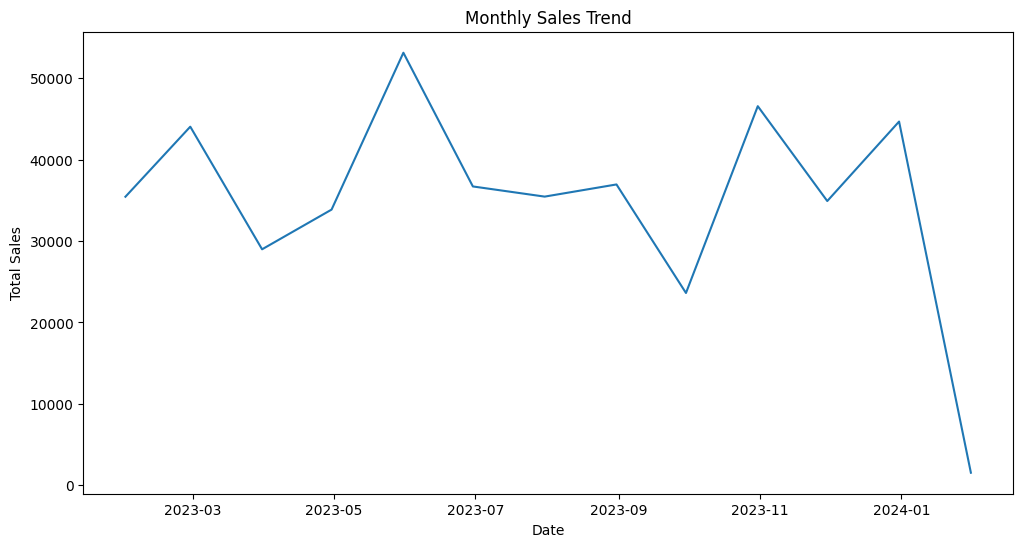

In [ ]:
# Monthly sales trend
monthly_sales = retail_data.resample('M', on='Date')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

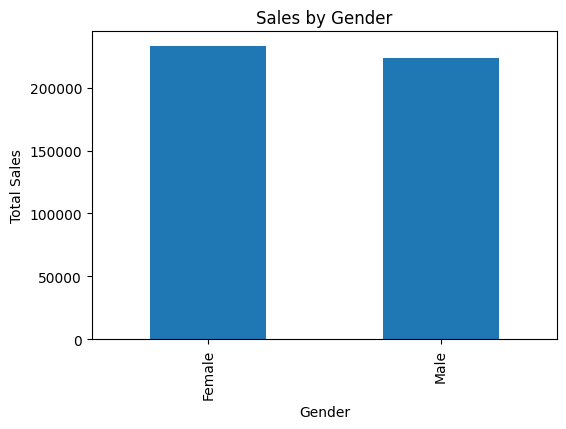

In [ ]:
# Sales by gender
gender_sales = retail_data.groupby('Gender')['Total Amount'].sum()
plt.figure(figsize=(6, 4))
gender_sales.plot(kind='bar')
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

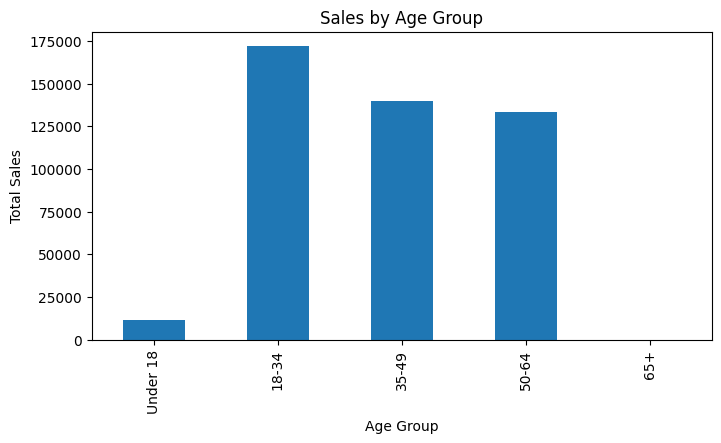

In [ ]:
# Sales by age group
age_bins = [0, 18, 35, 50, 65, np.inf]
age_labels = ['Under 18', '18-34', '35-49', '50-64', '65+']
retail_data['Age Group'] = pd.cut(retail_data['Age'], bins=age_bins, labels=age_labels)
age_group_sales = retail_data.groupby('Age Group')['Total Amount'].sum()
plt.figure(figsize=(8, 4))
age_group_sales.plot(kind='bar')
plt.title('Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.show()

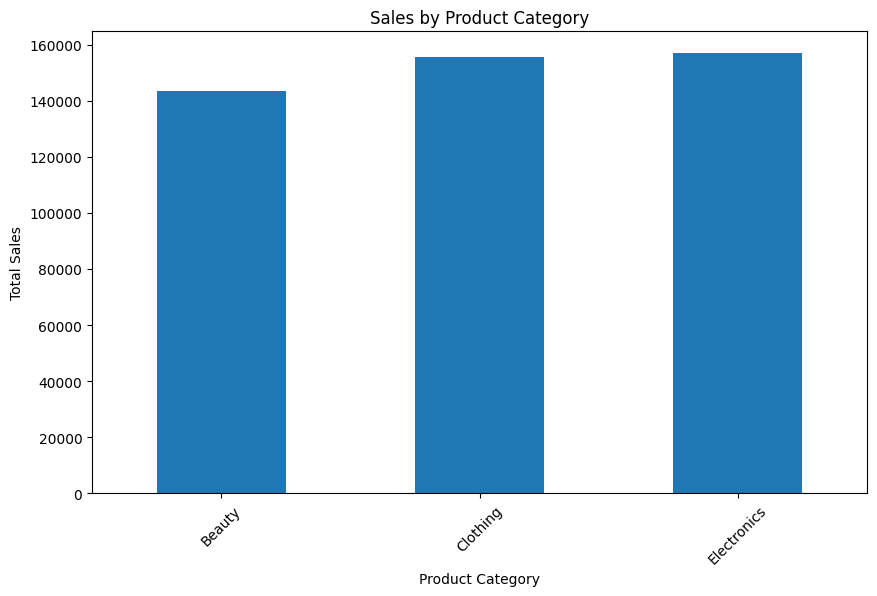

In [ ]:
# Sales by product category
product_category_sales = retail_data.groupby('Product Category')['Total Amount'].sum()
plt.figure(figsize=(10, 6))
product_category_sales.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

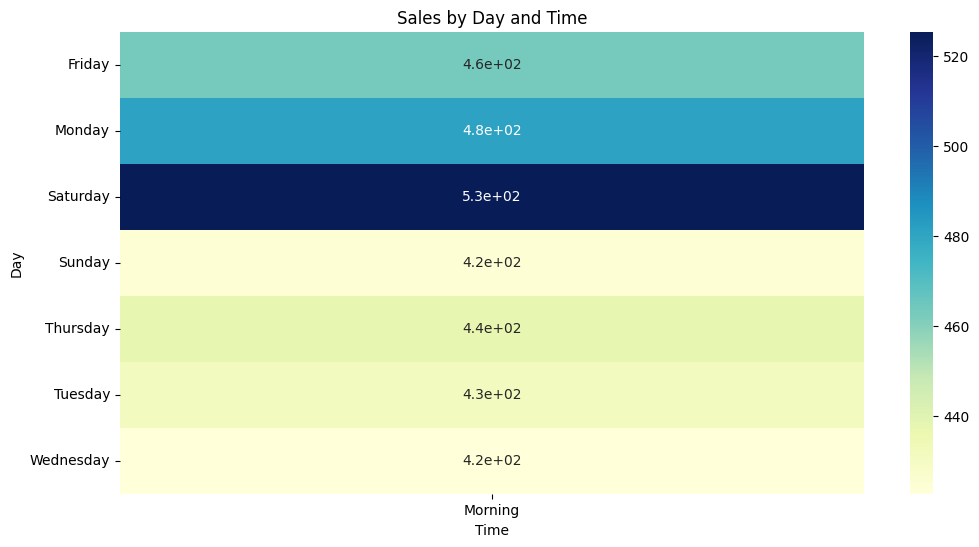

In [ ]:
# Heatmap for sales by day of week and time of day
retail_data['Day'] = retail_data['Date'].dt.day_name()
retail_data['Time'] = retail_data['Date'].dt.hour.apply(lambda x: 'Morning' if x < 12 else 'Afternoon' if x < 18 else 'Evening')
pivot_table = retail_data.pivot_table(index='Day', columns='Time', values='Total Amount', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Sales by Day and Time')
plt.show()